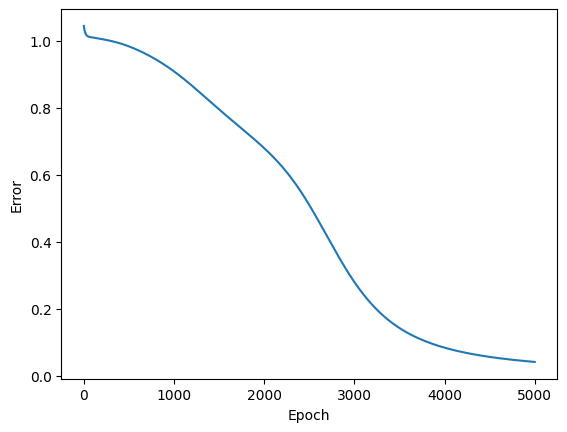

X: [0 0], y_pred: [0.08062016]
X: [0 1], y_pred: [0.90377611]
X: [1 0], y_pred: [0.90386285]
X: [1 1], y_pred: [0.12683061]


In [6]:
#This code trains a neural network to solve the XOR problem and then tests it on the same data.#

import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights randomly
        self.weights1 = np.random.randn(hidden_size, input_size+1)
        self.weights2 = np.random.randn(output_size, hidden_size+1)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_prime(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def forward(self, x):
        # Add bias term to input
        x = np.hstack((1, x))
        
        # Compute hidden layer activations
        a1 = np.dot(self.weights1, x)
        z1 = self.sigmoid(a1)
        
        # Add bias term to hidden layer
        z1 = np.hstack((1, z1))
        
        # Compute output layer activations
        a2 = np.dot(self.weights2, z1)
        z2 = self.sigmoid(a2)
        
        return z2
    
    def backward(self, x, y, alpha):
        # Add bias term to input
        x = np.hstack((1, x))
        
        # Compute hidden layer activations
        a1 = np.dot(self.weights1, x)
        z1 = self.sigmoid(a1)
        
        # Add bias term to hidden layer
        z1 = np.hstack((1, z1))
        
        # Compute output layer activations
        a2 = np.dot(self.weights2, z1)
        z2 = self.sigmoid(a2)
        
        # Compute output layer error
        delta2 = (z2 - y) * self.sigmoid_prime(a2)
        
        # Compute hidden layer error
        delta1 = np.dot(self.weights2.T[1:], delta2) * self.sigmoid_prime(a1)
        
        # Update weights
        self.weights2 -= alpha * np.outer(delta2, z1)
        self.weights1 -= alpha * np.outer(delta1, x)

# Define the training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create a neural network with 2 input nodes, 2 hidden nodes, and 1 output node
nn = NeuralNetwork(2, 2, 1)

# Train the neural network
epochs = 5000
alpha = 0.1
error_history = []

for i in range(epochs):
    error = 0
    
    for j in range(len(X)):
        # Forward pass
        y_pred = nn.forward(X[j])
        
        # Backward pass
        nn.backward(X[j], y[j], alpha)
        
        # Compute error
        error += (y[j] - y_pred) ** 2
    
    error_history.append(error)

# Plot the error over time
plt.plot(error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

# Test the neural network on the XOR problem
for i in range(len(X)):
    y_pred = nn.forward(X[i])
    print(f"X: {X[i]}, y_pred: {y_pred}")    
